In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [7]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,2.0,NaN,New Property,1630.0,NaN,NaN,0,0,0,0,0,0,47,588.666667
1,flat,pioneer park,sector 61,2.10,11667.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet a...,3,3,3,15.0,South-East,Relatively New,1800.0,NaN,1400.0,0,0,0,0,0,2,49,600.000000
2,flat,godrej air,sector 85,2.60,12212.0,2129.0,Built Up area: 2129 (197.79 sq.m.),3,3,3,17.0,NaN,Under Construction,NaN,2129.0,NaN,0,1,0,0,0,0,44,709.666667
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,1.0,North-East,Relatively New,1350.0,NaN,NaN,1,0,0,0,0,0,43,675.000000
4,flat,central park flower valley,sector 33,1.35,10385.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,3.0,West,New Property,NaN,NaN,1300.0,0,0,0,0,0,0,87,433.333333


In [9]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## built_up_area 

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

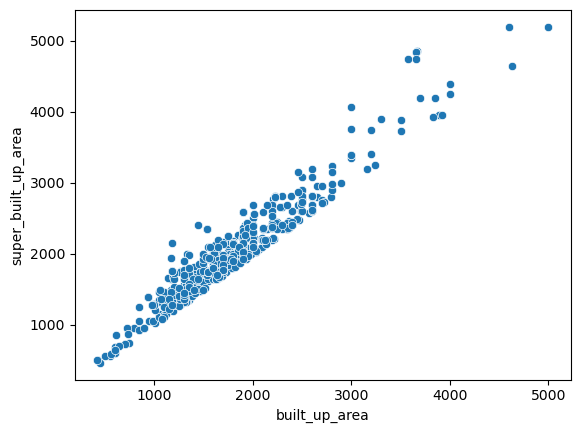

In [14]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

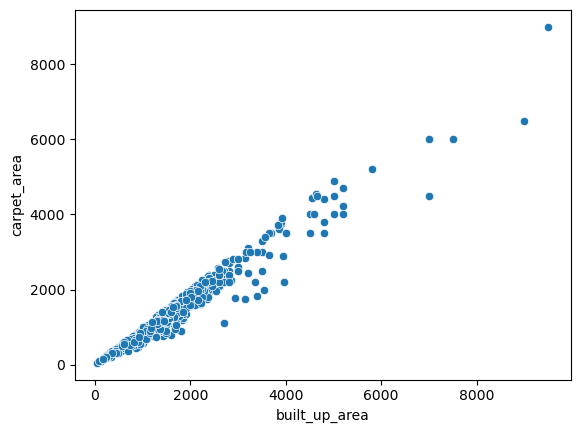

In [16]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [18]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [20]:
## dataframe that contain all 3 area values
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [22]:
all_present_df.shape

(531, 24)

In [24]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [26]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [28]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [30]:
# both(super built up and carpet) present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [32]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,pioneer park,sector 61,2.10,11667.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet a...,3,3,3,15.0,South-East,Relatively New,1800.0,NaN,1400.0,0,0,0,0,0,2,49,600.000000
22,flat,emaar gurgaon greens,sector 102,1.42,8606.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,4.0,North,Relatively New,1650.0,NaN,1022.0,0,0,0,0,1,0,49,550.000000
33,flat,tulip violet,sector 69,1.43,8888.0,1609.0,Super Built up area 1608(149.39 sq.m.)Carpet a...,3,3,2,1.0,South-West,Relatively New,1608.0,NaN,1039.0,0,0,0,1,0,0,86,536.333333
35,flat,shree vardhman victoria,sector 70,1.65,8462.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,5,3,6.0,North-East,Relatively New,1950.0,NaN,1161.0,0,1,0,1,0,0,167,650.000000
39,flat,dlf the ultima,sector 81,2.35,11233.0,2092.0,Super Built up area 2092(194.35 sq.m.)Carpet a...,3,4,3+,18.0,North,Relatively New,2092.0,NaN,1100.0,0,1,0,0,0,0,106,697.333333


In [34]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_12444\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\daksh\AppData\Local\Temp\ipykernel_12444\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [36]:
df.update(sbc_df)

In [38]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [40]:
# sb(super-bult up) present, carpet is null, built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [44]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,2.0,NaN,New Property,1630.0,NaN,NaN,0,0,0,0,0,0,47,588.666667
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,1.0,North-East,Relatively New,1350.0,NaN,NaN,1,0,0,0,0,0,43,675.000000
6,flat,m3m skywalk,sector 74,2.20,10902.0,2018.0,Super Built up area 2018(187.48 sq.m.),3,3,3,12.0,NaN,New Property,2018.0,NaN,NaN,1,0,0,0,0,2,15,672.666667
11,flat,tarc maceo,sector 91,0.96,5411.0,1774.0,Super Built up area 1404(130.44 sq.m.),2,2,3+,8.0,East,Moderately Old,1404.0,NaN,NaN,0,0,0,0,0,0,85,887.000000
12,flat,m3m soulitude,sector 89,1.25,8784.0,1423.0,Super Built up area 1423(132.2 sq.m.),3,3,3,3.0,East,New Property,1423.0,NaN,NaN,1,0,0,0,1,0,61,474.333333


In [46]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_12444\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\daksh\AppData\Local\Temp\ipykernel_12444\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(rou

In [48]:
df.update(sb_df)

In [50]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [52]:
# sb(super-built up) null, c is present, built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [54]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,central park flower valley,sector 33,1.35,10385.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,3.0,West,New Property,NaN,NaN,1300.0,0,0,0,0,0,0,87,433.333333
5,flat,signature global park,sohna road,0.55,6691.0,822.0,Carpet area: 822 (76.37 sq.m.),2,2,3,3.0,East,Undefined,NaN,NaN,822.0,0,0,0,0,0,0,58,411.000000
15,flat,supertech hues,sector 68,0.90,7627.0,1180.0,Carpet area: 1180 (109.63 sq.m.),2,2,2,1.0,East,New Property,NaN,NaN,1180.0,0,0,0,0,0,0,44,590.000000
32,flat,smart world orchard,sector 61,1.47,12783.0,1150.0,Carpet area: 1150 (106.84 sq.m.),2,2,2,4.0,East,Under Construction,NaN,NaN,1150.0,1,0,0,0,0,0,31,575.000000
41,flat,smart world orchard,sector 61,2.55,15644.0,1630.0,Carpet area: 1630 (151.43 sq.m.),3,3,2,4.0,NaN,New Property,NaN,NaN,1630.0,0,0,0,0,1,0,30,543.333333


In [56]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_12444\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\daksh\AppData\Local\Temp\ipykernel_12444\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carp

In [58]:
df.update(c_df)

In [60]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

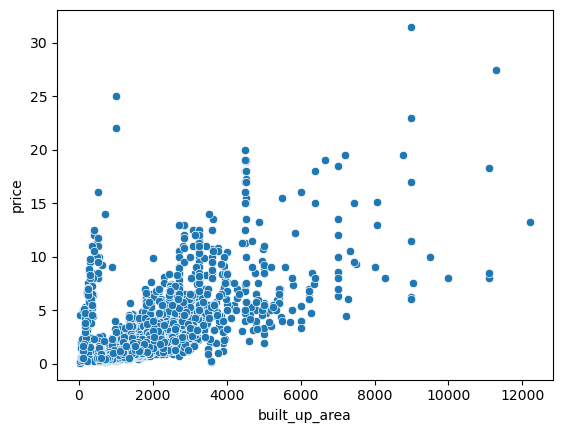

In [64]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [66]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [68]:
anamoly_df.sample(5)

,price,area,built_up_area
1416,3.40,1530.0,1530.0
1443,7.35,1760.0,240.0
2936,5.50,1800.0,1800.0
2060,3.60,1728.0,1728.0
2470,6.30,1800.0,1800.0


In [70]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [72]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

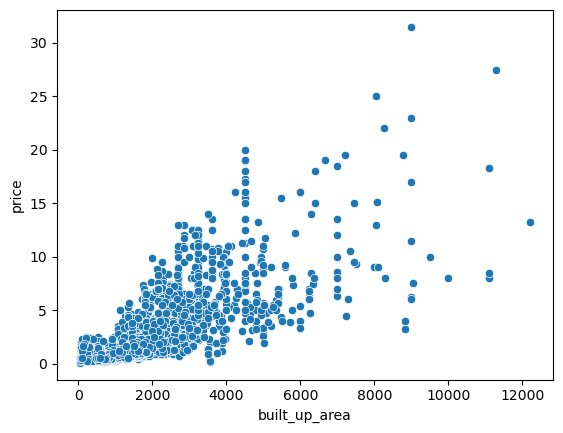

In [76]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [78]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [80]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,smart world orchard,sector 61,2.60,14723.0,3,3,2,2.0,NaN,New Property,1766.0,0,0,0,0,0,0,47
1,flat,pioneer park,sector 61,2.10,11667.0,3,3,3,15.0,South-East,Relatively New,1592.0,0,0,0,0,0,2,49
2,flat,godrej air,sector 85,2.60,12212.0,3,3,3,17.0,NaN,Under Construction,2129.0,0,1,0,0,0,0,44
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,2,2,3,1.0,North-East,Relatively New,1222.0,1,0,0,0,0,0,43
4,flat,central park flower valley,sector 33,1.35,10385.0,3,2,2,3.0,West,New Property,1444.0,0,0,0,0,0,0,87


In [82]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## floorNum 

In [85]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
46,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
107,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
300,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
729,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,1,0
755,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1582,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1649,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
2196,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
2256,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
2495,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0


In [87]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [89]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_12444\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [91]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [93]:
1011/df.shape[0]

0.2843881856540084

## facing

<Axes: ylabel='count'>

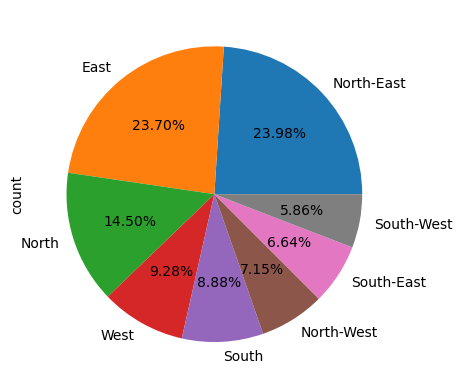

In [96]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [98]:
df.drop(columns=['facing'],inplace=True)

In [100]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1727,house,unitech uniworld resorts,sector 33,8.50,17820.0,5,5,3+,3.0,New Property,4770.0,1,1,1,1,0,2,145
2518,flat,tulip violet,sector 69,1.38,8973.0,3,3,1,12.0,Relatively New,1709.0,0,0,0,0,0,0,174
2477,flat,central park flower valley,sector 33,2.15,13522.0,3,3,3+,1.0,New Property,1439.0,0,0,0,0,0,0,31
2718,house,independent,sector 43,5.75,23663.0,4,4,2,4.0,Under Construction,2430.0,0,1,1,0,0,1,153
2178,flat,m3m skywalk,sector 74,1.54,11000.0,2,2,3+,22.0,Relatively New,1200.0,0,0,0,0,1,0,137


In [102]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [126]:
df.shape

(3555, 18)

In [128]:
df.dropna(inplace=True)

In [130]:
df.shape

(3554, 18)

## agePossession

In [135]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [137]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,signature global park,sohna road,0.55,6691.0,2,2,3,3.0,Undefined,913.0,0,0,0,0,0,0,58
9,flat,m3m heights,sector 65,2.00,13957.0,2,2,2,32.0,Undefined,1433.0,0,0,0,0,0,0,48
49,flat,central park flower valley,sector 33,2.50,13270.0,3,3,2,1.0,Undefined,2093.0,0,0,0,0,0,0,66
74,house,unitech escape,sector 50,12.00,37037.0,5,6,3+,3.0,Undefined,3240.0,0,0,0,0,0,0,66
104,flat,shapoorji pallonji joyville gurugram,sector 102,0.95,10383.0,2,2,2,14.0,Undefined,915.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,flat,m3m soulitude,sector 89,1.25,8784.0,3,3,0,4.0,Undefined,1423.0,0,0,0,0,0,0,61
3510,house,independent,sector 50,6.50,21667.0,5,6,0,1.0,Undefined,3000.0,0,0,0,0,0,0,0
3531,flat,signature global park,sohna road,0.58,7056.0,2,2,2,3.0,Undefined,822.0,0,0,0,0,0,0,58
3538,flat,tulip violet,sector 69,1.20,10909.0,2,3,0,0.0,Undefined,1100.0,0,0,0,0,0,0,54


In [139]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [141]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [143]:
df['agePossession'].value_counts()

agePossession
Relatively New        1718
New Property           594
Moderately Old         583
Old Property           326
Under Construction     281
Undefined               52
Name: count, dtype: int64

In [145]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [147]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [149]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           595
Moderately Old         590
Old Property           329
Under Construction     281
Undefined               33
Name: count, dtype: int64

In [151]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [153]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [155]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         621
New Property           595
Old Property           329
Under Construction     281
Name: count, dtype: int64

In [157]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [159]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [161]:
df.shape

(3554, 18)